# 2023-2024 Season Badminton BC Awards Re-Analysis

The 2024 Best of Badminton BC Awards took place on Saturday, September 21, at the Vancouver Lawn Tennis & Badminton Club. A list of awards were given to athletes, with an emphasis seemingly biased towards provincial results.

Identifying the best athletes in BC solely based on competition results within the province is less meaningful than evaluating them in the context of national competition. A better goal is to select athletes who can represent BC at the national level. By focusing only on results from BC tournaments, the current approach disregards higher-level performances. From a government funding and performance standpoint, the priority isn't simply determining who the best player in BC is, but rather identifying those who can best compete against athletes from other provinces on the national stage.

Scaling the idea to the next level, the best Canadian badminton players are the ones who can best compete FOR Canada on the international stage, like World Championships and the Olympic Games. Given the results of the awards this year, the top players in Canada like Brian Yang, Michelle Li, Nyl Yakura, and other national team members would not have received awards.

For the 2024 Best of Badminton BC Awards, national tournament results were not used to calculate provincial awards, likely due to oversight. This omission disproportionately affected athletes who performed well in national tournaments, as their results were not considered. Therefore, this would be an example of missing data classified as Missing Not at Random (MNAR), because the absence of this data is tied to the values of the missing data itself, which would have influenced the final award decisions.

## Re-analysis with National Results

Reassessing potential award winners with national results will focus on the following:
- A cleaned dataset which includes the results of all BC athletes from the 2023-2024 season junior national ranking list will be used
  - Data was taken in the summer of 2024, prior to the change in ranking points in September 2024. The previous ranking system lasted between 2016-2024.
- The age category of the calculations is based on the athlete's **age**
  - This means that they are under the age listed, but may have competed in higher level age categories. For example, Abbie Leung was technically U15 and can compete at the U15 level, but competed U17 nationally, and U19 provincially.
  - AND she didn't get a single award...
- U11, U23, Senior, and Master's results were not included
  - U11 results may be appropriate
  - Master's results were calculated differently as it would account for the best male and female player in the age category across all events. I cannot comment on that.
  - U23 and Senior results appear to be based on Provincial Champions. Additional comments will be made at the end of the notebook.

## Data Dictionary:
- `player`: name of player
- `memberID`: unique member ID
- `result`: tournament placement
  - **W**inner, **F**inalist, **S**emi-**F**inalist, **Q**uarter-**F**inalist
  - **R**ound of **16**, **R**ound of **32**, **R**ound of **64**
-	`default_points`: points awarded based on `result` and `tournament`
-	`event`: **B**oys/**G**irls **S**ingles/**D**oubles; Mi**X**ed **D**oubles
-	`tournament`: name of tournament
-	`week`: competition week based on the year
-	`grade`: value of tournament
  - National Champ > National Elite > PT Champ > PT Series
-	`club`: name of club
-	`birth_year`: birth year of player
-	`min_age_group`: minimum age group player can compete in

Data is available publicly from https://badmintoncanada.tournamentsoftware.com but may require some effort to compile together.
- Badminton Canada ranking points were taken from their previous General Competition Regulations (March 2023).
- Results for each tournament were collected via Excel and combined with Python
- Cleaning of data via Python


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load data
base_dir = '/content/drive/My Drive/Colab Notebooks/'

bcan_points_path = f'{base_dir}2023-2024 Ranking Points.xlsx'
bc_full_df_path = f'{base_dir}2023-2024 BC Ranking Points.csv'

bcan_points = pd.read_excel(bcan_points_path, sheet_name=2)
bc_full_df = pd.read_csv(bc_full_df_path)

bc_full_df.head()

Mounted at /content/drive


,player,memberID,result,default_points,event,tournament,week,grade,club,birth_year,min_age_group
0,Shingchun (Kevin) Wu,BC14906,W,850.0,BS,2024 BC Junior A and Open Provincial Champions...,2024-18,PT Champ (100%),Epic Racquet Sports Club,2009,U17
1,Marcus Zhou,BC13119,F,710.0,BS,2024 BC Junior A and Open Provincial Champions...,2024-18,PT Champ (100%),Hollyburn Country Club,2009,U17
2,Jasper Kong,BC16320,SF,585.0,BS,2024 BC Junior A and Open Provincial Champions...,2024-18,PT Champ (100%),ClearOne Richmond,2008,U17
3,Eden Dewei Liang,BC14809,SF,585.0,BS,2024 BC Junior A and Open Provincial Champions...,2024-18,PT Champ (100%),Ignite Badminton Club,2009,U17
4,Christopher Cui,BC15023,QF,460.0,BS,2024 BC Junior A and Open Provincial Champions...,2024-18,PT Champ (100%),Ace Badminton Centre,2008,U17


In [3]:
bc_full_df['grade'].value_counts()

,count
grade,
PT Series (100%),1148
National Junior Elite,432
PT Champ (100%),288
Junior National Championship,82


In [4]:
# Merge bc_full_df on 'default_points' and 'grade' with 'Points' and 'Level'
bc_full_df2 = pd.merge(
    bc_full_df,
    bcan_points[['Points', 'Level', 'Age']],
    left_on=['default_points', 'grade'],
    right_on=['Points', 'Level'],
    how='left'
)

bc_full_df2.drop(columns=['Points', 'Level'], inplace=True)

In [5]:
bc_full_df2.rename(columns={'Age': 'event_age'}, inplace=True)

col_order = [
    'player', 'memberID', 'result', 'default_points', 'event_age', 'event',
    'tournament', 'week', 'grade', 'club', 'birth_year', 'min_age_group'
]

bc_full_df2 = bc_full_df2[col_order]

In [6]:
# Sort data by 'event', then 'player', then most 'default_points'
bc_df_sorted = bc_full_df2.sort_values(
    ['event', 'player', 'default_points'],
    ascending=[True, True, False]
)

bc_df_sorted.head()

,player,memberID,result,default_points,event_age,event,tournament,week,grade,club,birth_year,min_age_group
77,Aiden Tang,BC15969,SF,290.0,U15,BD,2024 BC Junior A and Open Provincial Champions...,2024-18,PT Champ (100%),BC - Zone 4 - Other,2010,U15
690,Aiden Tang,BC15969,R16,230.0,U15,BD,2024 YONEX BC Junior Elite,2024-9,National Junior Elite,BC - Zone 4 - Other,2010,U15
515,Aiden Tang,BC15969,R16,112.0,U15,BD,2024 ClearOne Junior A - U15 & U19,2024-10,PT Series (100%),BC - Zone 4 - Other,2010,U15
1907,Allan Crawford,BC15210,QF,1515.0,U17,BD,2024 YONEX Canadian U23 & Junior Badminton Cha...,2024-20,Junior National Championship,ClearOne Richmond,2009,U17
865,Allan Crawford,BC15210,F,1065.0,U19,BD,2023 Victoria Junior A,2023-49,PT Series (100%),ClearOne Richmond,2009,U17


In [7]:
# Calculate top results per player per event
n_list = range(1, 8+1)  # Up to top 8 results

base_df = bc_df_sorted[['min_age_group', 'event', 'player']].drop_duplicates()

for n in n_list:
    top_n_points = bc_df_sorted.groupby(
        ['min_age_group', 'event', 'player']).apply(
        lambda x: x.nlargest(n, 'default_points')['default_points'].sum()
    ).reset_index(name=f'top_{n}')

    # Merge the top n results into the base DataFrame
    base_df = pd.merge(base_df, top_n_points, on=[
        'min_age_group', 'event', 'player'], how='left')

In [8]:
# Sort
base_df.sort_values(
    ['min_age_group', 'event', 'top_4'],
    ascending=[False, True, False],
    inplace=True)

base_df.head()

,min_age_group,event,player,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8
100,U19,BD,Ryan Liu,3030.0,4780.0,6200.0,7570.0,8635.0,9700.0,10620.0,11540.0
123,U19,BD,William Ka wang Ma,3030.0,4780.0,6200.0,7570.0,8635.0,9700.0,10577.0,11267.0
32,U19,BD,Ethan Yen,2110.0,3810.0,5180.0,6550.0,7825.0,9100.0,10375.0,11650.0
67,U19,BD,Lyem Fedoretz,2110.0,3810.0,5180.0,6550.0,7825.0,9100.0,10375.0,11650.0
77,U19,BD,Morgan Chang,2110.0,3480.0,4400.0,5090.0,5780.0,6230.0,6580.0,6580.0


## How many results to consider?
- Badminton Canada (and Badminton BC) has historically taken a player's best 4 results.
- However, many players have played more than 4 tournaments. If we were to take the best players, let's try taking more results.
- We will settle for best **5** results for now, and an additional explanation will be given later for this number.

In [9]:
# Decide on top n
best_players_top_n = base_df.groupby(['min_age_group', 'event']).apply(
    lambda x: x.nlargest(
        3,      # Top n Players
        'top_5' # Best n results summed
)).reset_index(drop=True)

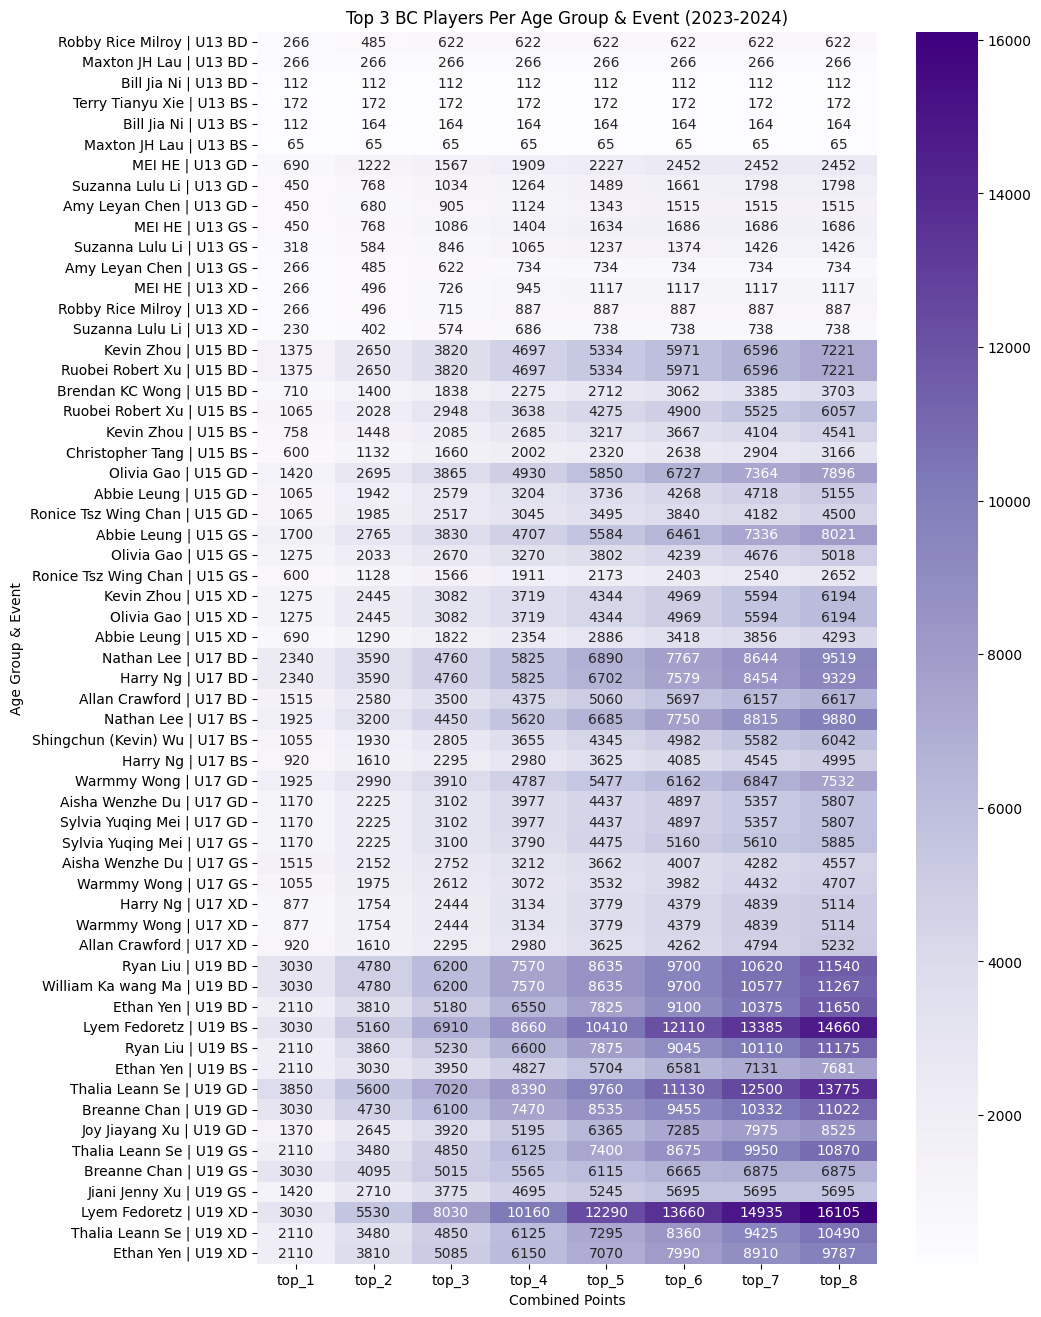

In [10]:
# Create a new label column that concatenates min_age_group, event, and player
best_players_top_n['label'] = (
    best_players_top_n['player'] + " | " +
    best_players_top_n['min_age_group'] + " " +
    best_players_top_n['event']
)

# Set player names as the index, and select only the top_1 to top_8 columns
heatmap_data = best_players_top_n.set_index('label').loc[:, 'top_1':'top_8']

# Create the heatmap
plt.figure(figsize=(10, 16))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='Purples')

plt.title('Top 3 BC Players Per Age Group & Event (2023-2024)')
plt.xlabel('Combined Points')
plt.ylabel('Age Group & Event')

# Show the plot
plt.show()

# Compare with 2024 BBC Awards List
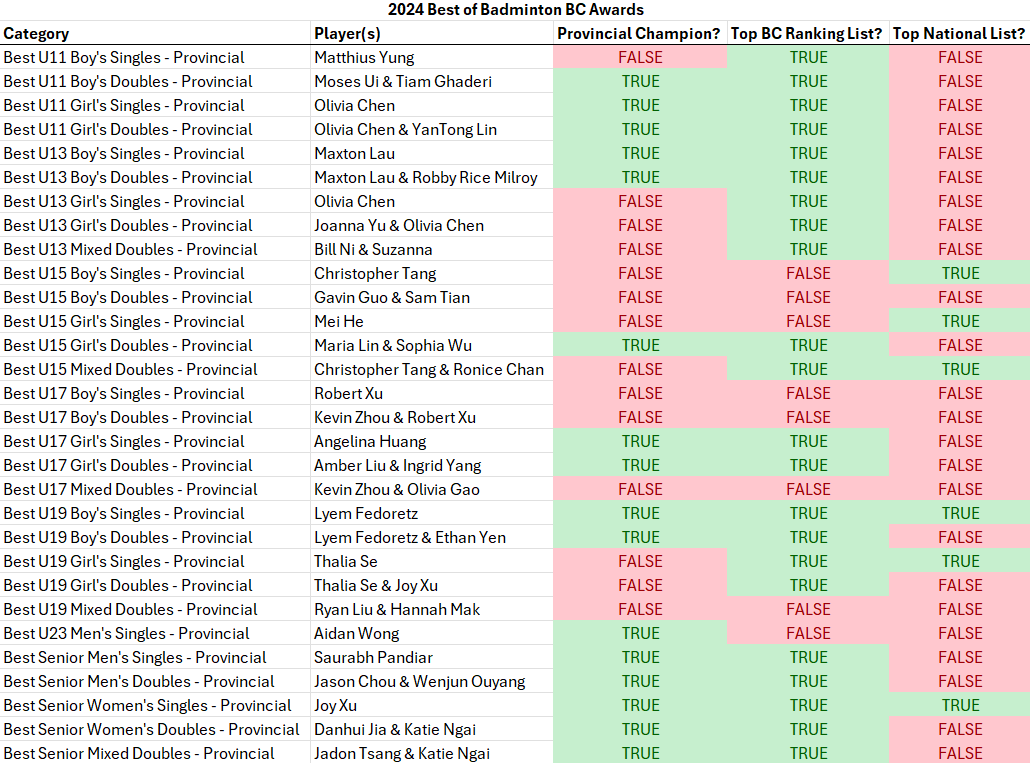

## Let's first look at the 2024 BBC Awards List
- In trying to reverse engineer the ranking list, a first pass at the ranking list gave the impression that the results were largely based on results at provincial championships, and possible the Badminton BC ranking list. This was mostly correct.
- However, some results did not match either, so the Badminton Canada rankings were consulted. There may be some slight discrepancies due to the way points were calculated from this season onward, but in many cases, this should not affect the top result, unless it was really close. That is why I included top 3 results in my calculations to compare.
- For U13 and U23, there are no ranking lists, which would naturally make it `FALSE` for *Top National List?*
- What is most important is where values are `FALSE` in all 3 columns. This includes U15 BD, U17 BS, U17 BD, U17 XD, and U19 XD.
  - For the U17 results for Robert XU, Kevin ZHOU, and Olivia GAO by Badminton BC, they have clearly miscategorized the age category as these are U15 athletes. Looking at their results, this becomes quite clear when Robert XU and Kevin ZHOU were U15 Jr National BD Champions in 2024, and Kevin ZHOU and Olivia GAO were U15 Jr National XD Finalists.
  - This has taken away from the true U17 award winners, based on the data, of Nathan LEE (U17 BS), Nathan LEE/Harry NG (U17 BD), and Harry NG/Warmmy WONG (U17 XD). Nathan/Harry are the U17 Jr National BD Finalists in 2024, and Nathan qualified to represent Canada in U17 BS at the 2024 Pan Am Junior Championships.
  - For U19 XD, there were two other teams that had better performance results. Lyem FEDORETZ had the highest national ranking of all BC XD players, as he competed with a partner from outside of BC. However, his performance with Thalia SE, who is the highest ranked BC female player, would have been one of the better choices for the U19 XD award. The other team would be Ethan YEN/Breanne CHAN, who have won against Lyem/Thalia and were also the U19 BC Provincial Champions in 2024. Their national rankings are also higher than the team that was awarded.
  - Lastly, Abbie Leung should have received an award for her singles. Despite being eligible to play U15, her overall results in the 2023-2024 season has put her as one of the top players, despite not being eligible to play Junior Nationals, which has the most points. She is also the 2024 U19 Provincial Champion, again, despite being U15. However, due to her not competing at all in U15, and though U19 Provincial Champion, she was not the top ranked player provincially or nationally U19, the most fitting award would be U17 GS.
- There are other major discrepancies, but since nothing is likely to change, I simply hoped to address some deserving players based on my re-analysis.

#### Reference Links:
- [2024 BC Junior A and Open Provincial Championship (U15,U17,U23, Open A & B)](https://badmintoncanada.tournamentsoftware.com/tournament/5f17ff22-3c9f-4199-ae91-c0838750a59e)
- [2024 BC Junior A Provincial Championship (U11 and U13)](https://badmintoncanada.tournamentsoftware.com/tournament/bfd27e27-dc1e-437a-8e24-da96957fd955)
- [2024 BC Junior A Provincial Championship \(U19\)
](https://badmintoncanada.tournamentsoftware.com/tournament/7948f910-6011-4a94-9eb3-6a8a6b9a155a)
- [Badminton BC Junior Ranking (22-2024)](https://badmintoncanada.tournamentsoftware.com/ranking/ranking.aspx?id=40392)
- [Badminton BC Senior Ranking (20-2024)](https://badmintoncanada.tournamentsoftware.com/ranking/ranking.aspx?rid=63)
- [Badminton Canada Junior Ranking (36-2024)](https://badmintoncanada.tournamentsoftware.com/ranking/ranking.aspx?id=42126)
- [Badminton Canada Ranking (36-2024)
](https://badmintoncanada.tournamentsoftware.com/ranking/ranking.aspx?id=42111)

# Compare Old Points vs. New Points for Top BC Athletes
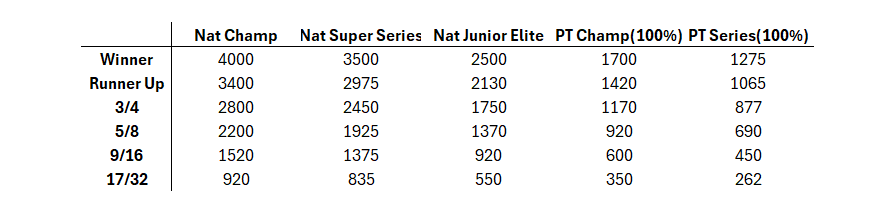


# New Ranking Points for the 2024-2025 Season for Badminton Canada
- Let's include the new points table (manually).
- We will re-run the analysis from the previous season with this year's ranking point adjustment to see if there are any differences.
  - One major note is the reduction of points for winning the Junior National Championship has been **reduced** (e.g. winning was reduced from 5500 points to 4000 points, with respective changes in other placings).
  - There is also a new event (Junior Super Series) introduced, but it is irrelevant to our calculations for the previous season.

Let's see if there are any changes...

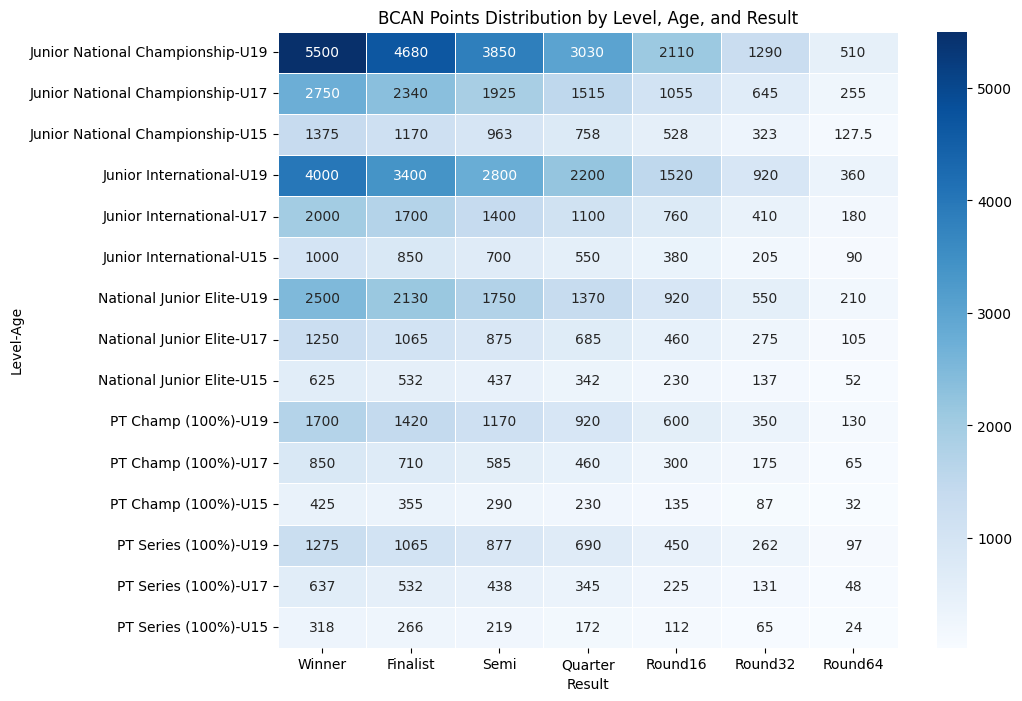

In [11]:
# Point distribution of OLD rankings

# Create order of levels
level_order = [
    "Junior National Championship",
    "Junior International",
    "National Junior Elite",
    "PT Champ (100%)",
    "PT Series (100%)"
]

# Convert to categorical type with custom order
bcan_points['Level'] = pd.Categorical(
    bcan_points['Level'],
    categories=level_order,
    ordered=True
)

# Pivot
bcan_points_pivot = bcan_points.pivot_table(
    index=['Level', 'Age'],
    columns='Result',
    values='Points',
    aggfunc='sum'
)

# Column reordering
bcan_points_pivot = bcan_points_pivot[[
    'Winner',
    'Finalist',
    'Semi',
    'Quarter',
    'Round16',
    'Round32',
    'Round64'
]]

bcan_points_pivot = bcan_points_pivot.sort_index(
    level=['Level', 'Age'],
    ascending=[True, False]
)

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    bcan_points_pivot,
    annot=True,
    fmt="g",
    cmap="Blues",
    linewidths=.5
)

plt.title('BCAN Points Distribution by Level, Age, and Result')
plt.show()

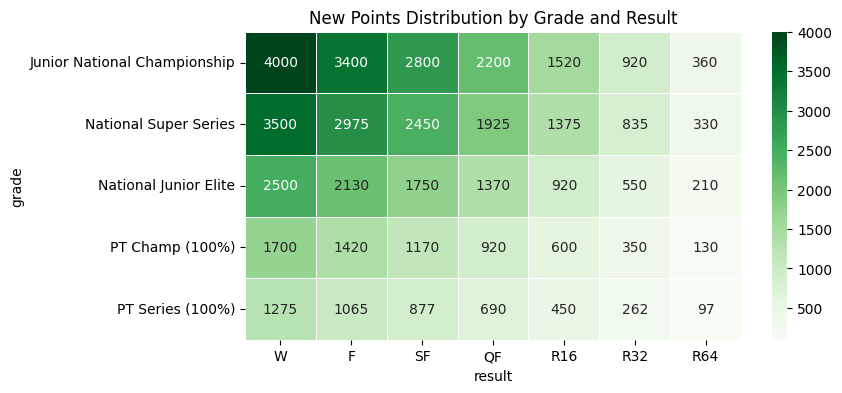

In [12]:
# New Points Table (easier this way)
new_points = {
    'result': ['W', 'F', 'SF', 'QF', 'R16', 'R32', 'R64'],
    'Junior National Championship': [4000, 3400, 2800, 2200, 1520, 920, 360],
    'National Super Series': [3500, 2975, 2450, 1925, 1375, 835, 330],
    'National Junior Elite': [2500, 2130, 1750, 1370, 920, 550, 210],
    'PT Champ (100%)': [1700, 1420, 1170, 920, 600, 350, 130],
    'PT Series (100%)': [1275, 1065, 877, 690, 450, 262, 97]
}

# Make into DF
new_points_df = pd.DataFrame(new_points)

# Unpivot
new_points_df = new_points_df.melt(
    id_vars='result',
    var_name='grade',
    value_name='new_points'
)

# Create a custom order for the "grade" column
grade_order = [
    "Junior National Championship",
    "National Super Series",
    "National Junior Elite",
    "PT Champ (100%)",
    "PT Series (100%)"
]

# Convert the "grade" column to a categorical type with the custom order
new_points_df['grade'] = pd.Categorical(
    new_points_df['grade'],
    categories=grade_order,
    ordered=True
)

# Pivot the data to have 'grade' and 'result' as indexes
# with 'new_points' as values
new_points_pivot = new_points_df.pivot_table(
    index='grade',
    columns='result',
    values='new_points',
    aggfunc='sum'
)

# Reorder the columns to match the order of results
new_points_pivot = new_points_pivot[[
    'W', 'F', 'SF', 'QF', 'R16', 'R32', 'R64'
]]

# Creating the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(
    new_points_pivot,
    annot=True,
    fmt="g",
    cmap="Greens",
    linewidths=.5
)

plt.title('New Points Distribution by Grade and Result')
plt.show()

## Key Insight
- The major difference for the new ranking system is that points across each age category are the same. Previously, higher age categories received more points.
  - Based on previous work on ranking points, the old ranking system is better as it rewards players for playing up. However, some adjustment was needed as the bonuses were too much (up to 4x the amount).

In [13]:
# Merge bc_df_sorted with new_points_df
bc_new_points_df = pd.merge(
    bc_df_sorted,
    new_points_df[['new_points', 'grade', 'result']],
    on=['grade', 'result'],
    how='left'
)

new_col_order = [
    'player', 'memberID', 'result', 'default_points', 'new_points',
    'event_age', 'event', 'tournament', 'week', 'grade', 'club',
    'birth_year', 'min_age_group'
]

bc_new_points_df = bc_new_points_df[new_col_order]
bc_new_points_df.head()

,player,memberID,result,default_points,new_points,event_age,event,tournament,week,grade,club,birth_year,min_age_group
0,Aiden Tang,BC15969,SF,290.0,1170,U15,BD,2024 BC Junior A and Open Provincial Champions...,2024-18,PT Champ (100%),BC - Zone 4 - Other,2010,U15
1,Aiden Tang,BC15969,R16,230.0,920,U15,BD,2024 YONEX BC Junior Elite,2024-9,National Junior Elite,BC - Zone 4 - Other,2010,U15
2,Aiden Tang,BC15969,R16,112.0,450,U15,BD,2024 ClearOne Junior A - U15 & U19,2024-10,PT Series (100%),BC - Zone 4 - Other,2010,U15
3,Allan Crawford,BC15210,QF,1515.0,2200,U17,BD,2024 YONEX Canadian U23 & Junior Badminton Cha...,2024-20,Junior National Championship,ClearOne Richmond,2009,U17
4,Allan Crawford,BC15210,F,1065.0,1065,U19,BD,2023 Victoria Junior A,2023-49,PT Series (100%),ClearOne Richmond,2009,U17


In [14]:
# Sort data by 'event', then 'player', then most 'new_points'
bc_df_new_sorted = bc_new_points_df.sort_values(
    ['event', 'player', 'new_points'],
    ascending=[True, True, False]
)

# New base df
new_base_df = bc_df_new_sorted[
    ['min_age_group', 'event', 'player']].drop_duplicates()

# Create top_n_points from new_points
for n in n_list:
    top_n_points = bc_df_new_sorted.groupby(
        ['min_age_group', 'event', 'player']).apply(
        lambda x: x.nlargest(n, 'new_points')['new_points'].sum()
    ).reset_index(name=f'top_{n}')

    # Merge the top n results into the base DataFrame
    new_base_df = pd.merge(new_base_df, top_n_points, on=[
        'min_age_group', 'event', 'player'], how='left')

# Reorder
new_base_df.sort_values(
    ['min_age_group', 'event', 'top_4'],
    ascending=[False, True, False],
    inplace=True)

In [15]:
# Decide on number of top players; total top results
new_best_players_top_n = new_base_df.groupby(['min_age_group', 'event']).apply(
    lambda x: x.nlargest(
        3,      # Top n Players
        'top_5' # Best n results summed
)).reset_index(drop=True)

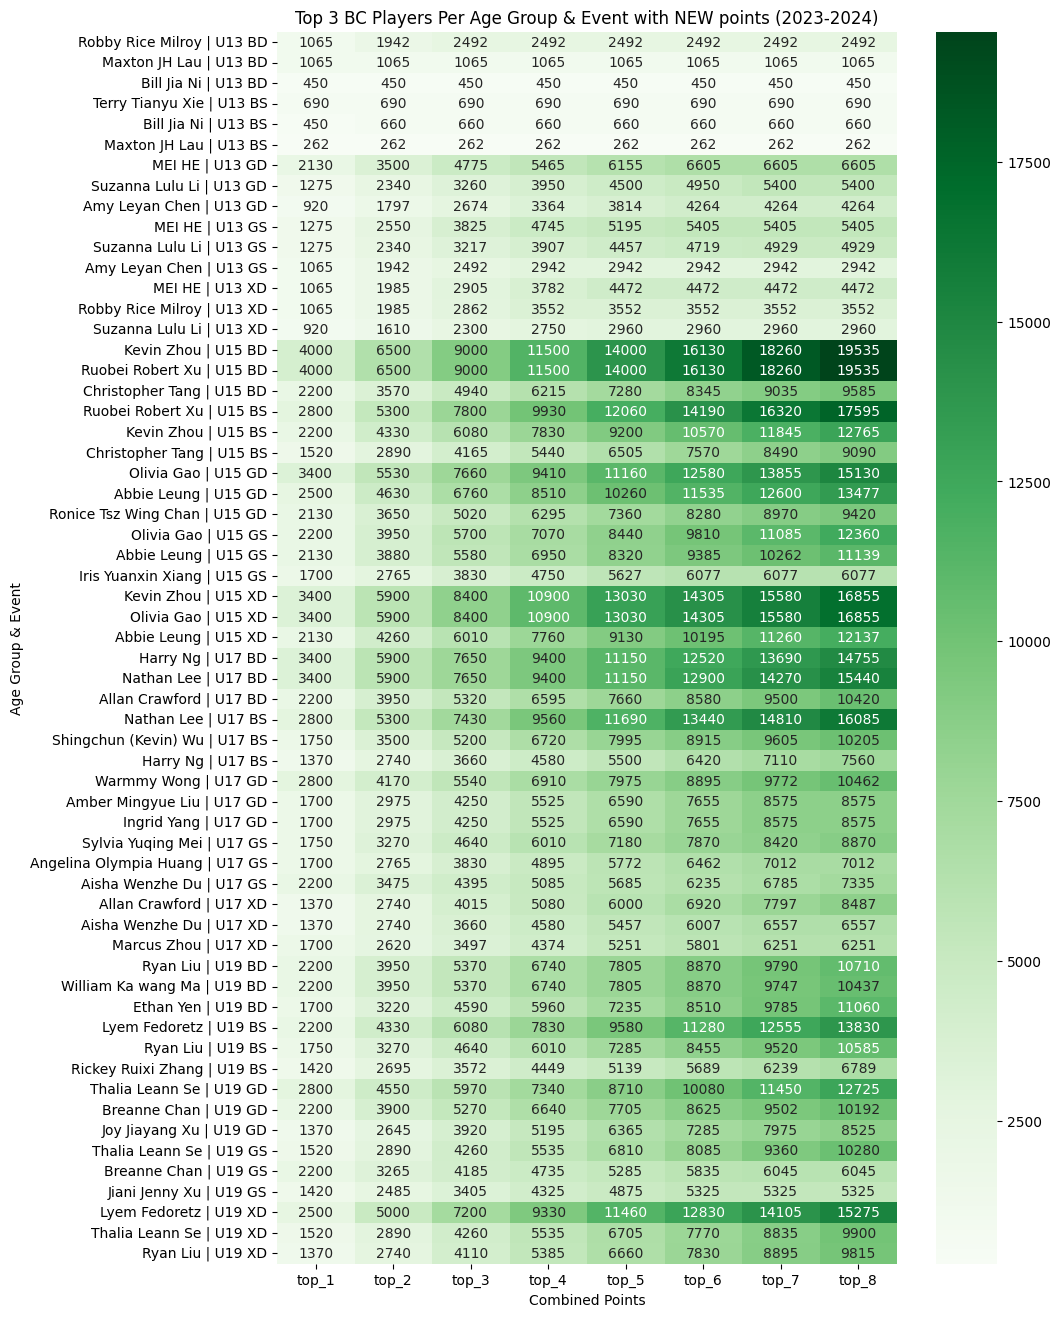

In [16]:
# Create a new label column that concatenates min_age_group, event, and player
new_best_players_top_n['label'] = (
    new_best_players_top_n['player'] + " | " +
    new_best_players_top_n['min_age_group'] + " " +
    new_best_players_top_n['event']
)

# Set player names as the index, and select only the top_1 to top_8 columns
heatmap_data = new_best_players_top_n.set_index('label').loc[:, 'top_1':'top_8']

# Create the heatmap
plt.figure(figsize=(10, 16))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='Greens')

plt.title('Top 3 BC Players Per Age Group & Event with NEW points (2023-2024)')
plt.xlabel('Combined Points')
plt.ylabel('Age Group & Event')

# Show the plot
plt.show()


# Some changes, but not much for the top players
- We can now see some names that appeared in the 2024 BBC Awards list, but they are still not the top players on the list. Removing the performance bonuses for certain players have regularized results, but if considering the top players, the list is still very different from the one developed by Badminton BC.
- It is worth mentioning that there are changes made to this season's (2024-2025) competition regulations, where they want to be more "merit-based". However, some skepticism is justified given the selection of awards that are supposed to be based on 'merit'.

# How many tournaments should we use?

It is unclear why we take "top 4" results over any other arbitrary number, but perhaps we can see if a better number of events can be used instead.

Let's take a look at the distribution of players per event in BC.

In [17]:
# Group by player and event, then count the number of tournaments
tournament_counts = (bc_df_sorted.groupby(['player', 'event'])['tournament']
                     .count()
                     .reset_index(name='tournament_count'))

# Create a histogram faceted by event
fig = px.histogram(
    tournament_counts,
    x="tournament_count",
    color="event",
    facet_col="event",
    nbins=13,
    title="Distribution of Tournament Counts per Player by Event")

fig.update_xaxes(title_text='# tournaments')

fig.show()

## Based on the distributions...

- For most events, there are a lot of players that only play a couple of tournaments in BC.
- Generally, there are less female players than male players.

In [18]:
# Look at descriptive statistics of tournament participation
num_tourneys = bc_df_sorted.groupby(['player', 'event'])['tournament'].count()
num_tourneys_df = num_tourneys.reset_index(name='tournament_count')

num_tourneys_df.groupby('event')['tournament_count'].describe()

,count,mean,std,min,25%,50%,75%,max
event,,,,,,,,
BD,137.0,3.547445,3.134183,1.0,1.0,3.0,5.00,13.0
BS,158.0,3.468354,3.021517,1.0,1.0,2.0,5.00,13.0
GD,51.0,4.803922,2.856709,1.0,3.0,4.0,7.00,12.0
GS,56.0,4.321429,3.009724,1.0,2.0,4.0,6.25,12.0
XD,106.0,4.047170,3.304779,1.0,1.0,3.0,6.00,12.0


## Key Insights
- Junior rankings typically use top 4 results
- Maximum number of tournaments is 13 for boys, 12 for girls.

What is a good number to consider?
- Top 3?
- Top 4? **(currently used)**
- Top 5?
- Top 6?

In [19]:
# Let's remove players that played only once or twice
num_tourneys_df_min_3 = (
    num_tourneys_df[num_tourneys_df['tournament_count'] >= 3].copy()
)

num_tourneys_df_min_3.groupby('event')['tournament_count'].describe()

,count,mean,std,min,25%,50%,75%,max
event,,,,,,,,
BD,70.0,5.785714,2.967910,3.0,3.0,5.0,7.0,13.0
BS,78.0,5.717949,2.878029,3.0,3.0,5.0,7.0,13.0
GD,39.0,5.897436,2.337282,3.0,4.0,6.0,7.0,12.0
GS,37.0,5.864865,2.551276,3.0,4.0,5.0,7.0,12.0
XD,54.0,6.574074,2.852353,3.0,4.0,6.0,9.0,12.0


In [44]:
# Create a histogram faceted by event
fig = px.histogram(
    num_tourneys_df_min_3,
    x="tournament_count",
    color="event",
    facet_col="event",
    nbins=12,
    title="Distribution of Tournament Counts per Player by Event")

fig.show()

## Key Insights

- It looks like the average number of tournaments in most events is between 5 and 6; with the median also between 5 and 6 tournaments.
- Considering there were about 7 tournaments in BC (~5 Junior A, BC Elite, & Provincial Championships), 4 seems too little, and 6 seems too much.

**Using top 5 results seems to be a fair choice, given the data and arbitrary assumptions**

Truly calculating the optimal number of tournaments can be for another project!

In [21]:
# Create a new column indicating the tournament count range using .loc[]
num_tourneys_df_min_3.loc[:, 'tournament_range'] = pd.cut(
    num_tourneys_df_min_3['tournament_count'],
    bins=[2, 5, float('inf')],
    labels=['3-5', '>5']
)

# Group by tournament range and count the number of players
tournament_range = num_tourneys_df_min_3.groupby(
    ['event', 'tournament_range'], observed=True)['player'].count().unstack()

# Calculate the total number of players for each tournament range using .loc[]
tournament_range.loc[:, 'Total 3-5'] = tournament_range['3-5'].sum()
tournament_range.loc[:, 'Total >5'] = tournament_range['>5'].sum()

tournament_range

tournament_range,3-5,>5,Total 3-5,Total >5
event,,,,
BD,40,30,149,129
BS,44,34,149,129
GD,19,20,149,129
GS,20,17,149,129
XD,26,28,149,129


## Key Insights
Across all events, it seems like 5 total results (instead of 4) is appropriate for our purposes based on the following rationale:
- Players playing 1 or 2 tournaments are not serious players, given rankings are maximized with 4 tournaments.
- Considering 4 results would simply reference current ranking lists (assuming all results are included, which they are not in the BBC ranking list).
- Further analysis needed, but data for all Canadian players would be necessary for recommendations based on the national ranking system. Using a subset of data from BC players would be inappropriate for this analysis.

# Concluding Remarks

- The awards for best senior players was poorly done, as they simply used the results at the 2024 Provincial Championships. Additionally, only two tournaments were used for results on the Badminton BC ranking list.
- Two major tournaments in BC were missing from rankings:
  - 2023-2024 BC Senior Elite
  - 2024 Canadian National Championships
- These results are important, because we had a player that won both of those tournaments. Duncan YAO won MD in both tournaments and is the current Canadian national champion. Does he deserve a reward? **YES!!** Did he get an award? ...
- I also have a personal gripe, because I probably shoult have won an award for my performance in Mixed Doubles. Here are the details:
  - Won 2023-2024 BC Senior Elite
  - Bronze medal at 2024 Canadian National Championships
  - Won Jack Underhill (BC Senior Ranking Tournament)
  - Didn't play 2024 Provincials, due to the registration announced extremely late. There were only 13 days from the announcement date and entry deadline. Additionally, my regular partner for the season was preparing for junior nationals and did not compete in the tournament.
  - Using a similar method of calculations that incorporate national results, it is extremely likely that I would have placed first.

## Where do we go from here?

I don't know. Given the bias in the 2024 Awards, it de-values awards because the decision making process was unfair. The best players, based on objective competition results, were not appropriately recognized. It's different for other awards, like for coach of the year, if it was based on nominations and voting, but that would make it more of a popularity contest than an objective measure of recognizing the best coach of the season.

Personally, I wouldn't trade any of real results I've achieved this season for this award. For those that didn't get an award that they deserved, don't give up! Keep doing great things and enjoy each achievement when you get them. For those that got an award this year, congratulations! I hope this will encourage you to challenge yourself and truly become the best in BC.

#### Reference Links:
- [2023-2024 YONEX BC Senior Elite](https://badmintoncanada.tournamentsoftware.com/sport/winners.aspx?id=96B4FB7F-33CA-4E5E-82BD-74A2F322449F)
- [2024 YONEX Canadian Senior / Para Badminton Championships](https://badmintoncanada.tournamentsoftware.com/sport/winners.aspx?id=257f63d5-45f7-4a38-b36b-8efe3a226de8)
- [2024 VRC Jack Underhill Open A and B Tournament](https://badmintoncanada.tournamentsoftware.com/sport/winners.aspx?id=6DBC438D-5F21-4544-9A89-C651CE550C1B)
- [2024 BC Junior A and Open Provincial Championship (U15,U17,U23, Open A & B)](https://badmintoncanada.tournamentsoftware.com/tournament/5f17ff22-3c9f-4199-ae91-c0838750a59e)

# One More Thing
- Which club to most of the players belong to?

In [34]:
best_players_top_3 = base_df.groupby(['min_age_group', 'event']).apply(
    lambda x: x.nlargest(
        3,      # Top n Players
        'top_5' # Best n results summed
)).reset_index(drop=True)

In [40]:
df2_unique = bc_full_df[['player', 'club']].drop_duplicates()

best_players_top_3_club = pd.merge(
    best_players_top_3,
    df2_unique,
    on='player',
    how='left'
)

best_players_top_3_club.drop(
    ['top_1', 'top_2', 'top_3', 'top_6', 'top_7', 'top_8'],
    axis=1,
    inplace=True
)

In [42]:
best_players_top_3_club

,min_age_group,event,player,top_4,top_5,club
0,U13,BD,Robby Rice Milroy,622.0,622.0,Hollyburn Country Club
1,U13,BD,Maxton JH Lau,266.0,266.0,Shuttlesport Badminton Academy
2,U13,BD,Bill Jia Ni,112.0,112.0,ClearOne Richmond
3,U13,BS,Terry Tianyu Xie,172.0,172.0,Ace Badminton Centre
4,U13,BS,Bill Jia Ni,164.0,164.0,ClearOne Richmond
5,U13,BS,Maxton JH Lau,65.0,65.0,Shuttlesport Badminton Academy
6,U13,GD,MEI HE,1909.0,2227.0,Ace Badminton Centre
7,U13,GD,Suzanna Lulu Li,1264.0,1489.0,ClearOne Richmond
8,U13,GD,Amy Leyan Chen,1124.0,1343.0,Ace Badminton Centre
9,U13,GS,MEI HE,1404.0,1634.0,Ace Badminton Centre
